In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import ml_metrics as metrics
from sklearn.ensemble import AdaBoostClassifier


In [2]:
#load datasets
train_10k = pd.read_csv('train_downsampled_10k.csv')
train_11k = pd.read_csv('train_downsampled_11k.csv')
train_12k = pd.read_csv('train_downsampled_12k.csv')
train_13k = pd.read_csv('train_downsampled_13k.csv')
train_14k = pd.read_csv('train_downsampled_14k.csv')
train_15k = pd.read_csv('train_downsampled_15k.csv')

In [3]:
# Drop unnecessary features
train_10k = train_10k.drop(['date_time'], axis=1)
train_10k = train_10k.drop(['srch_ci'], axis=1)
train_10k = train_10k.drop(['srch_co'], axis=1)

train_11k = train_11k.drop(['date_time'], axis=1)
train_11k = train_11k.drop(['srch_ci'], axis=1)
train_11k = train_11k.drop(['srch_co'], axis=1)

train_12k = train_12k.drop(['date_time'], axis=1)
train_12k = train_12k.drop(['srch_ci'], axis=1)
train_12k = train_12k.drop(['srch_co'], axis=1)

train_13k = train_13k.drop(['date_time'], axis=1)
train_13k = train_13k.drop(['srch_ci'], axis=1)
train_13k = train_13k.drop(['srch_co'], axis=1)

train_14k = train_14k.drop(['date_time'], axis=1)
train_14k = train_14k.drop(['srch_ci'], axis=1)
train_14k = train_14k.drop(['srch_co'], axis=1)

train_15k = train_15k.drop(['date_time'], axis=1)
train_15k = train_15k.drop(['srch_ci'], axis=1)
train_15k = train_15k.drop(['srch_co'], axis=1)

In [4]:
#Split the data
train_new_10k = train_10k[((train_10k.year == 2013) | ((train_10k.year == 2014) & (train_10k.month < 8)))]
test_new_10k = train_10k[((train_10k.year == 2014) & (train_10k.month >= 8))]
train_new_11k = train_11k[((train_11k.year == 2013) | ((train_11k.year == 2014) & (train_11k.month < 8)))]
test_new_11k = train_11k[((train_11k.year == 2014) & (train_11k.month >= 8))]
train_new_12k = train_12k[((train_12k.year == 2013) | ((train_12k.year == 2014) & (train_12k.month < 8)))]
test_new_12k = train_12k[((train_12k.year == 2014) & (train_12k.month >= 8))]
train_new_13k = train_13k[((train_13k.year == 2013) | ((train_13k.year == 2014) & (train_13k.month < 8)))]
test_new_13k = train_13k[((train_13k.year == 2014) & (train_13k.month >= 8))]
train_new_14k = train_14k[((train_14k.year == 2013) | ((train_14k.year == 2014) & (train_14k.month < 8)))]
test_new_14k = train_14k[((train_14k.year == 2014) & (train_14k.month >= 8))]
train_new_15k = train_15k[((train_15k.year == 2013) | ((train_15k.year == 2014) & (train_15k.month < 8)))]
test_new_15k = train_15k[((train_11k.year == 2014) & (train_15k.month >= 8))]

In [5]:
test_new_10k = test_new_10k[test_new_10k.is_booking == 1]
test_new_11k = test_new_11k[test_new_11k.is_booking == 1]
test_new_12k = test_new_12k[test_new_12k.is_booking == 1]
test_new_13k = test_new_13k[test_new_13k.is_booking == 1]
test_new_14k = test_new_14k[test_new_14k.is_booking == 1]
test_new_15k = test_new_15k[test_new_15k.is_booking == 1]

In [6]:
X_train_new_10k = train_new_10k.drop(['hotel_cluster'], axis=1)
Y_train_new_10k = train_new_10k['hotel_cluster']
X_train_new_11k = train_new_11k.drop(['hotel_cluster'], axis=1)
Y_train_new_11k = train_new_11k['hotel_cluster']
X_train_new_12k = train_new_12k.drop(['hotel_cluster'], axis=1)
Y_train_new_12k = train_new_12k['hotel_cluster']
X_train_new_13k = train_new_13k.drop(['hotel_cluster'], axis=1)
Y_train_new_13k = train_new_13k['hotel_cluster']
X_train_new_14k = train_new_14k.drop(['hotel_cluster'], axis=1)
Y_train_new_14k = train_new_14k['hotel_cluster']
X_train_new_15k = train_new_15k.drop(['hotel_cluster'], axis=1)
Y_train_new_15k = train_new_15k['hotel_cluster']

In [7]:
X_test_new_10k = test_new_10k.drop(['hotel_cluster'], axis=1)
Y_test_new_10k = test_new_10k['hotel_cluster']
X_test_new_11k = test_new_11k.drop(['hotel_cluster'], axis=1)
Y_test_new_11k = test_new_11k['hotel_cluster']
X_test_new_12k = test_new_12k.drop(['hotel_cluster'], axis=1)
Y_test_new_12k = test_new_12k['hotel_cluster']
X_test_new_13k = test_new_13k.drop(['hotel_cluster'], axis=1)
Y_test_new_13k = test_new_13k['hotel_cluster']
X_test_new_14k = test_new_14k.drop(['hotel_cluster'], axis=1)
Y_test_new_14k = test_new_14k['hotel_cluster']
X_test_new_15k = test_new_15k.drop(['hotel_cluster'], axis=1)
Y_test_new_15k = test_new_15k['hotel_cluster']

In [8]:
def mean_average_precision(y_test, y_pred_proba):
    y_pred_k = np.array([y_pred_proba[i].argsort()[-5:][::-1] 
        for i in range(len(y_test))]) # k=5 most likely predicted classes for each input
    map_score = metrics.mapk(y_test.values[np.newaxis].T, y_pred_k, 5)
    return map_score

In [9]:
abc_10k = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_11k = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_12k = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_13k = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_14k = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc_15k = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [10]:
abc_10k.fit(X_train_new_10k, Y_train_new_10k)
abc_11k.fit(X_train_new_11k, Y_train_new_11k)
abc_12k.fit(X_train_new_12k, Y_train_new_12k)
abc_13k.fit(X_train_new_13k, Y_train_new_13k)
abc_14k.fit(X_train_new_14k, Y_train_new_14k)
abc_15k.fit(X_train_new_15k, Y_train_new_15k)

AdaBoostClassifier(learning_rate=1)

In [11]:
abc_pred_10k = abc_10k.predict(X_test_new_10k)
abc_pred_11k = abc_11k.predict(X_test_new_11k)
abc_pred_12k = abc_12k.predict(X_test_new_12k)
abc_pred_13k = abc_13k.predict(X_test_new_13k)
abc_pred_14k = abc_14k.predict(X_test_new_14k)
abc_pred_15k = abc_15k.predict(X_test_new_15k)

In [12]:
abc_prob_10k = abc_10k.predict_proba(X_test_new_10k)
abc_prob_11k = abc_11k.predict_proba(X_test_new_11k)
abc_prob_12k = abc_12k.predict_proba(X_test_new_12k)
abc_prob_13k = abc_13k.predict_proba(X_test_new_13k)
abc_prob_14k = abc_14k.predict_proba(X_test_new_14k)
abc_prob_15k = abc_15k.predict_proba(X_test_new_15k)

In [13]:
print(abc_prob_10k)

[[1.06161752e-02 2.98813176e-03 1.05826301e-02 ... 1.05419806e-02
  1.03883996e-02 1.06436639e-02]
 [1.04608210e-02 5.53716197e-03 1.03002818e-02 ... 1.02421849e-02
  1.04864476e-02 1.03841885e-02]
 [1.07178948e-02 1.63155919e-06 1.07620539e-02 ... 1.07488314e-02
  1.02672325e-02 1.09513362e-02]
 ...
 [1.04608210e-02 5.53716197e-03 1.03002818e-02 ... 1.02421849e-02
  1.04864476e-02 1.03841885e-02]
 [1.06950946e-02 1.06686543e-06 1.07950756e-02 ... 1.06589152e-02
  1.04854877e-02 1.07724035e-02]
 [1.08716813e-02 1.64791810e-03 1.06108103e-02 ... 1.06051313e-02
  1.07708526e-02 1.05906972e-02]]


In [14]:
accuracy_10k = accuracy_score(Y_test_new_10k, abc_pred_10k)
print('Accuracy', accuracy_10k)
accuracy_11k = accuracy_score(Y_test_new_11k, abc_pred_11k)
print('Accuracy', accuracy_11k)
accuracy_12k = accuracy_score(Y_test_new_12k, abc_pred_12k)
print('Accuracy', accuracy_12k)
accuracy_13k = accuracy_score(Y_test_new_13k, abc_pred_13k)
print('Accuracy', accuracy_13k)
accuracy_14k = accuracy_score(Y_test_new_14k, abc_pred_14k)
print('Accuracy', accuracy_14k)
accuracy_15k = accuracy_score(Y_test_new_15k, abc_pred_15k)
print('Accuracy', accuracy_15k)

Accuracy 0.05931581265599765
Accuracy 0.05904490007786141
Accuracy 0.06446939514668598
Accuracy 0.05637040280210158
Accuracy 0.055936891711914766
Accuracy 0.06123514819166993


In [15]:
map_10k = mean_average_precision(Y_test_new_10k, abc_prob_10k)
print("Mean Average Precision@5", map_10k)
map_11k = mean_average_precision(Y_test_new_11k, abc_prob_11k)
print("Mean Average Precision@5", map_11k)
map_12k = mean_average_precision(Y_test_new_12k, abc_prob_12k)
print("Mean Average Precision@5", map_12k)
map_13k = mean_average_precision(Y_test_new_13k, abc_prob_13k)
print("Mean Average Precision@5", map_13k)
map_14k = mean_average_precision(Y_test_new_14k, abc_prob_14k)
print("Mean Average Precision@5", map_14k)
map_15k = mean_average_precision(Y_test_new_15k, abc_prob_15k)
print("Mean Average Precision@5", map_15k)

Mean Average Precision@5 0.11880046982821905
Mean Average Precision@5 0.11074919975776451
Mean Average Precision@5 0.12148979838222866
Mean Average Precision@5 0.10392768534734384
Mean Average Precision@5 0.11254823617798722
Mean Average Precision@5 0.11218392305348826


In [16]:
mapk_scores = [map_10k, map_11k, map_12k, map_13k, map_14k, map_15k]

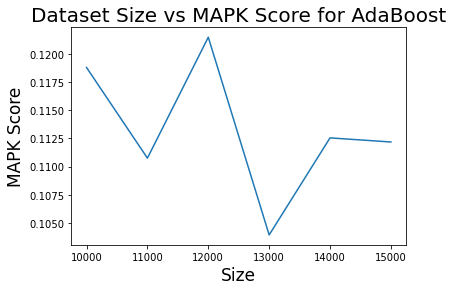

In [17]:
dataset_size = [10000, 11000, 12000, 13000, 14000, 15000]

plt.plot(dataset_size,mapk_scores)
plt.title("Dataset Size vs MAPK Score for AdaBoost",fontsize=20)
plt.xlabel("Size",fontsize=17)
plt.ylabel("MAPK Score",fontsize=17)
plt.show()